# Trust Prediction Using Machine Learning Techniques

## 1. Load Data

In [ ]:
import csv
import pandas as pd

df=pd.read_csv('/content/epinion.csv')

df.head(10)


,FromNodeId,ToNodeId
0,0,4
1,0,5
2,0,7
3,0,8
4,0,9
5,0,10
6,0,11
7,0,12
8,0,13
9,0,14


Checking the data for any missing rows/ duplicates


In [ ]:
sum(df.isna().any(1))


0

In [ ]:
sum(df.duplicated())


0

In [ ]:
import networkx as nx
df.to_csv('/content/epinion.csv',header=False,index=False)
#storing the list of edges in a varible 
g=nx.read_edgelist('/content/epinion.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#printing the information of graph
print(nx.info(g))

DiGraph with 75879 nodes and 508836 edges


## 2. Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
pd.read_csv('/content/epinion.csv',nrows=25)
subgraph=nx.read_edgelist('/content/epinion.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))


## 3. Data Preparation

Generating some edges which are not present in graph for supervised learning


In [ ]:
import random
r = csv.reader(open('/content/epinion.csv','r'))
edges = dict()
for edge in r:
	edges[(edge[0], edge[1])] = 1
    
missing_edges = set([])
while (len(missing_edges)<51301):
	a=random.randint(1, 6551)
	b=random.randint(1, 6551)
	tmp = edges.get((a,b),-1)
	if tmp == -1 and a!=b:
		try:
			if nx.shortest_path_length(g,source=a,target=b) > 2: 

				missing_edges.add((a,b))
			else:
				continue  
		except:  
				missing_edges.add((a,b))              
	else:
		continue

In [ ]:
import pickle
pickle.dump(missing_edges,open('missing_edges_final.p','wb'))

### Train-Test Split

In [ ]:
from sklearn import model_selection
import numpy as np

df_pos = pd.read_csv('/content/epinion.csv')
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])
#Trian test split 
#Spiltted data into 80-20 
#positive links and negative links seperatly because we need positive training data only for creating graph 
#and for feature generation
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = model_selection.train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = model_selection.train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])
#removing header and saving
X_train_pos.to_csv('train_pos.csv',header=False, index=False)
X_test_pos.to_csv('test_pos.csv',header=False, index=False)
X_train_neg.to_csv('train_neg.csv',header=False, index=False)
X_test_neg.to_csv('test_neg.csv',header=False, index=False)

Number of nodes in the graph with edges 508837
Number of nodes in the graph without edges 51301
Number of nodes in the train data graph with edges 407069 = 407069
Number of nodes in the train data graph without edges 41040 = 41040
Number of nodes in the test data graph with edges 101768 = 101768
Number of nodes in the test data graph without edges 10261 = 10261


In [ ]:
import os

if (os.path.isfile('train_pos.csv')) and (os.path.isfile('test_pos_after.csv')):        
    train_graph=nx.read_edgelist('train_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('test_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    ttpi= len(train_nodes_pos.intersection(test_nodes_pos))
    ttpd = len(train_nodes_pos - test_nodes_pos)
    dptt = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',ttpi)
    print('no of people present in train but not present in test -- ',ttpd)

    print('no of people present in test but not present in train -- ',dptt)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(dptt/len(test_nodes_pos)*100))

In [ ]:
if (not os.path.isfile('train.csv')) and \
(not os.path.isfile('test.csv')) and \
(not os.path.isfile('train_y.csv')) and \
(not os.path.isfile('test_y.csv')) and \
(os.path.isfile('train_pos.csv')) and \
(os.path.isfile('test_pos.csv')) and \
(os.path.isfile('train_neg.csv')) and \
(os.path.isfile('test_neg.csv')):
    
    X_train_pos = pd.read_csv('train_pos.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('test_pos.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('train_neg.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('test_neg.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    X_train.to_csv('train.csv',header=False,index=False)
    X_test.to_csv('test.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)


Number of nodes in the train data graph with edges 407069
Number of nodes in the train data graph without edges 41040
Number of nodes in the test data graph with edges 101768
Number of nodes in the test data graph without edges 10261


## 4. Featurisation

### 1. Jaccard Index

In [ ]:
def jaccard_for_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    (len(set(g.successors(a)).union(set(g.successors(b)))))
    except:
        return 0
    return sim

In [ ]:
jaccard_for_followees(1,4)

0.09695290858725762

In [ ]:
jaccard_for_followees(0,4)

0.15675675675675677

In [ ]:
def jaccard_for_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 (len(set(g.predecessors(a)).union(set(g.predecessors(b)))))
        return sim
    except:
        return 0

In [ ]:
jaccard_for_followers(1,3)

0.03380281690140845

In [ ]:
jaccard_for_followers(0,10)

0.09894459102902374

### 2. Salton Index(Cosine Similarity)

In [ ]:
#for followees
import math
def cosine_for_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b))))) /\
                                    (math.sqrt(len(set(g.successors(a)))*len((set(g.successors(b))))))
        return sim
    except:
        return 0

In [ ]:
cosine_for_followees(0,13)

0.055978284637524

In [ ]:
import math
def cosine_for_followers(a,b):
    try:
        
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                     (math.sqrt(len(set(g.predecessors(a))))*(len(set(g.predecessors(b)))))
        return sim
    except:
        return 0


In [ ]:
cosine_for_followers(1,4)

0.013842001210310392

### 3. Adamic-Adar Index

In [ ]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(g.successors(a)).intersection(set(g.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(g.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [ ]:
calc_adar_in(0,6)

1.2063731783579081



### 4. Hub Improved Index

In [ ]:
def calc_hub_promoted_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        x=(len(set(g.successors(a))))
        y=(len(set(g.successors(b))))
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                 min(x,y)
        return sim
    except:
        return 0

In [ ]:
calc_hub_promoted_followees(1,2)

0.5370370370370371

In [ ]:
calc_hub_promoted_followees(1,5)

0.46534653465346537

In [ ]:
def calc_hub_promoted_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        x=(len(set(g.predecessors(a))))
        y=(len(set(g.predecessors(b))))
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 min(x,y)
        return sim
    except:
        return 0

In [ ]:
calc_hub_promoted_followers(1,5)

0.36904761904761907

In [ ]:
calc_hub_promoted_followers(12,13)

0.03180212014134275

### 5. Hub Depressed Index

In [ ]:
def calc_hub_depressed_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        x=(len(set(g.successors(a))))
        y=(len(set(g.successors(b))))
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                 max(x,y)
        return sim
    except:
        return 0


In [ ]:
calc_hub_depressed_followees(1,2)

0.090625

In [ ]:
calc_hub_depressed_followees(1,5)

0.146875

In [ ]:
def calc_hub_depressed_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        x=(len(set(g.predecessors(a))))
        y=(len(set(g.predecessors(b))))
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 max(x,y)
        return sim
    except:
        return 0

In [ ]:
calc_hub_depressed_followers(1,5)

0.0876944837340877

### 6. Leicht-Holme-Newman Index

In [ ]:
def cal_lhn_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    len(set(g.successors(a)))*(len(set(g.successors(b))))
        return sim
    except:
        return 0



In [ ]:
cal_lhn_followees(1,2)

4.89375

In [ ]:
def cal_lhn_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                    len(set(g.predecessors(a)))*len(set(g.predecessors(b)))
        return sim
    except:
        return 0

In [ ]:
cal_lhn_followers(12,13)

7.174647887323944

### Resource allocation index

### 7.Page Rank 

PageRank works by counting the number and quality of links to a nodes to determine a rough estimate of how important the node is.

In [ ]:
import networkx as nx
pr = nx.pagerank(g, alpha=0.85)
pickle.dump(pr,open('page_rank.p','wb'))
mean_pr=float(sum(pr.values())) / len(pr)
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))


min 2.8653962734226504e-06
max 0.004657201317038452
mean 1.3178876896128775e-05


### 8.Katz Centrality

Katz centrality of a node is a measure of centrality in a network. Unlike typical centrality measures which consider only the shortest path between a pair of nodes, Katz centrality measures influence by taking into account the total number of walks between a pair of nodes.

In [ ]:
katz = nx.katz.katz_centrality(g,alpha=0.005,beta=1)
pickle.dump(katz,open('katz.p','wb'))
mean_katz=0.0007483801279873423
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))


min 0.00327004058263681
max 0.07755761407863213
mean 0.0034642427108420954


### 9. HITS

Hyper-link induced topic search (HITS) identifies good authorities and hubs for a topic by assigning two numbers to a node : an authority and a hub weight. Authorities estimate the node value based on the incoming links. Hubs estimates the node value based on outgoing links.

In [ ]:
hits = nx.hits(g, max_iter=100, tol=1e-08, nstart=None, normalized=True)
pickle.dump(hits,open('hits.p','wb'))
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min -4.784798798221463e-24
max 0.002524548511910053
mean 1.3178876896110969e-05


### 10. Weakly Connected Components

In [ ]:
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [ ]:
wcc=list(nx.weakly_connected_components(g))
def belongs_to_same_wcc(a,b):
    index = []
    if g.has_edge(b,a):
        return 1
    if g.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                g.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    g.add_edge(a,b)
                    return 0
                else:
                    g.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

### Final Train-Test Matrix

In [78]:
df_final_train = pd.read_csv('train.csv', names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('train_y.csv', names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)
y_train = df_final_train['indicator_link']

#test 
df_final_test = pd.read_csv('test.csv', names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('test_y.csv', names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)
y_test=df_final_test['indicator_link']


Our train matrix size  (448108, 3)
Our test matrix size  (112029, 3)


In [58]:
print(df_final_test.shape)
print(df_final_train.shape)

(112029, 3)
(448108, 3)


### Addition of all Features

In [74]:
df_final_train['jaccard_outdegree'] = df_final_train[0:448108].apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_outdegree'] = df_final_test[0:112029].apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

df_final_train['jaccard_followees'] = df_final_train[:448108].apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_followees'] = df_final_test[0:112029].apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    

df_final_train['cosine_followers'] = df_final_train[:448108].apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['cosine_followers'] = df_final_test[0:112029].apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

df_final_train['cosine_followees'] = df_final_train[:448108].apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['cosine_followees'] = df_final_test[0:112029].apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)

                                          
df_final_train['adar_index'] = df_final_train[:448108].apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
df_final_test['adar_index'] = df_final_test[0:112029].apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)


In [79]:
df_final_train['hub_promoted_followees'] = df_final_train[:448108].apply(lambda row:
                                            calc_hub_promoted_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['hub_promoted_followees'] = df_final_test[0:112029].apply(lambda row:
                                            calc_hub_promoted_followees(row['source_node'],row['destination_node']),axis=1)

df_final_train['hub_promoted_followers'] = df_final_train[:448108].apply(lambda row:
                                            calc_hub_promoted_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['hub_promoted_followers'] = df_final_test[0:112029].apply(lambda row:
                                            calc_hub_promoted_followers(row['source_node'],row['destination_node']),axis=1)

In [80]:
df_final_train['hub_depressed_followees'] = df_final_train[:448108].apply(lambda row:
                                            calc_hub_depressed_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['hub_depressed_followees'] = df_final_test[0:112029].apply(lambda row:
                                            calc_hub_depressed_followees(row['source_node'],row['destination_node']),axis=1)

df_final_train['hub_depressed_followers'] = df_final_train[:448108].apply(lambda row:
                                            calc_hub_depressed_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['hub_depressed_followers'] = df_final_test[0:112029].apply(lambda row:
                                            calc_hub_depressed_followers(row['source_node'],row['destination_node']),axis=1)

In [81]:
df_final_train['lhn_followees'] = df_final_train[:448108].apply(lambda row:
                                            cal_lhn_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['lhn_followees'] = df_final_test[0:112029].apply(lambda row:
                                            cal_lhn_followees(row['source_node'],row['destination_node']),axis=1)

df_final_train['lhn_followers'] = df_final_train[:448108].apply(lambda row:
                                            cal_lhn_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['lhn_followers'] = df_final_test[:112029].apply(lambda row:
                                            cal_lhn_followers(row['source_node'],row['destination_node']),axis=1)


In [82]:
df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))

df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))

df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))

df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))


In [83]:
df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)


In [84]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
print(df_final_train.shape)

(448108, 15)


In [85]:
df_final_train.head(3)

,hub_promoted_followees,hub_promoted_followers,hub_depressed_followees,hub_depressed_followers,lhn_followees,lhn_followers,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,same_comp
0,0.015625,0.080000,0.011111,0.058824,1.406250,2.720000,0.000033,0.000033,0.003792,0.004000,0.000124,0.000087,0.000027,0.000045,1
1,0.448276,0.183406,0.218487,0.178723,53.344828,43.100437,0.000341,0.000386,0.012163,0.014795,0.000303,0.000614,0.000676,0.000909,1
2,0.341880,0.295547,0.285714,0.164414,47.863248,40.610360,0.000675,0.000400,0.021141,0.015052,0.000518,0.000689,0.001359,0.000942,1


## 5. Train Model

### 1. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


from scipy.stats import randint

param_dist = {"n_estimators":randint(50,75),
              "max_depth": randint(5,10),
              "min_samples_split": randint(100,150),
              "min_samples_leaf": randint(25,55)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='accuracy',random_state=25)

rf_random.fit(df_final_train,y_train)

clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

print('mean test scores',rf_random.cv_results_['mean_test_score'])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))


0.9713020735702362


Test confusion_matrix


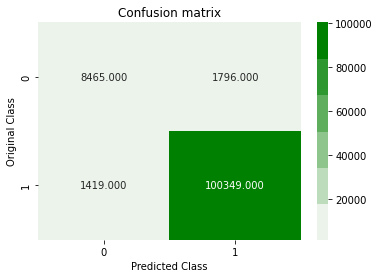

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)


### 2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
y_test_pred=knn.fit(df_final_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.predict(df_final_test))


[1 1 1 ... 0 0 0]


In [ ]:
print(knn.score(df_final_test, y_test))

0.9589448823992495


In [ ]:
ans_pred=knn.predict(df_final_test)

Test confusion_matrix


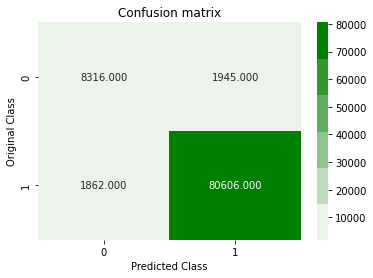

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

print('Test confusion_matrix')
plot_confusion_matrix(y_test,ans_pred)


### 3. Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1).fit(df_final_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
classifier_predications= clf.predict(df_final_test)
print(accuracy_score(y_test,classifier_predications))


0.9084076444492051


Test confusion_matrix


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


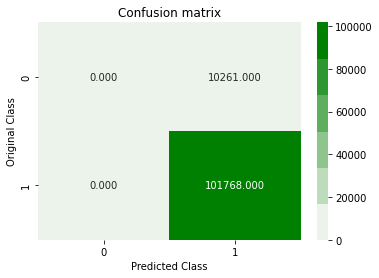

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

print('Test confusion_matrix')
plot_confusion_matrix(y_test,classifier_predications)


### 4. Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(df_final_train)
x_test = sc_x.transform(df_final_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(df_final_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.8886091994037258


Test confusion_matrix


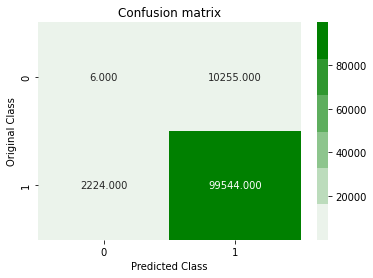

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_pred)


### 5. LightGBM

In [49]:
import lightgbm as lgb
from sklearn import metrics


In [50]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
y_test_pred=model.fit(df_final_train,y_train,eval_set=[(df_final_test,y_test),(df_final_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.0956444	training's binary_logloss: 0.0956444	valid_0's binary_logloss: 0.0945765	valid_0's binary_logloss: 0.0945765
[40]	training's binary_logloss: 0.0742419	training's binary_logloss: 0.0742419	valid_0's binary_logloss: 0.0739308	valid_0's binary_logloss: 0.0739308
[60]	training's binary_logloss: 0.0680745	training's binary_logloss: 0.0680745	valid_0's binary_logloss: 0.0684638	valid_0's binary_logloss: 0.0684638
[80]	training's binary_logloss: 0.0651467	training's binary_logloss: 0.0651467	valid_0's binary_logloss: 0.0664016	valid_0's binary_logloss: 0.0664016
[100]	training's binary_logloss: 0.0632061	training's binary_logloss: 0.0632061	valid_0's binary_logloss: 0.0651178	valid_0's binary_logloss: 0.0651178


In [51]:
print('Training accuracy {:.4f}'.format(model.score(df_final_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(df_final_test,y_test)))


Training accuracy 0.9704
Testing accuracy 0.9701


In [53]:
y_pred = model.predict(df_final_test)

Test confusion_matrix


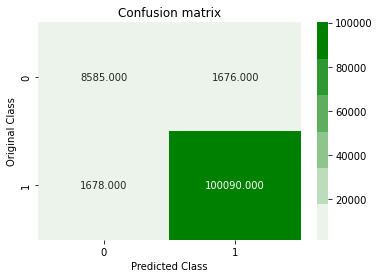

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_pred)


## 6. Analysis

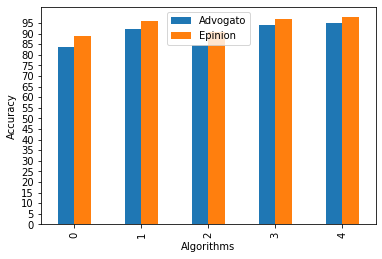

<Figure size 360x144 with 0 Axes>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


  
data = [['LR', 83.7, 88.8],
        ['KNN', 92.1, 95.8],
        ['SVM', 84.5, 90.8],
        ['RF', 94.3, 97.1],
        ['LGBM', 95.0, 97.7]]

df = pd.DataFrame(data, columns = ['Ml Algorithm','Advogato','Epinion'] )
  
df.plot.bar()
  
# plot between 2 attributes
plt.bar(df['Advogato'], df['Epinion'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.yticks( range(0,100,5) )   
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(2)

f.show()